In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from PIL import Image
fish = Image.open("fish.jpg")
chess = Image.open("chess.jpg")
frame_f = np.asarray(fish)
frame_c = np.asarray(chess)
Fish_N = frame_f.shape[0] * frame_f.shape[1]
Chess_N = frame_c.shape[0] * frame_c.shape[1]

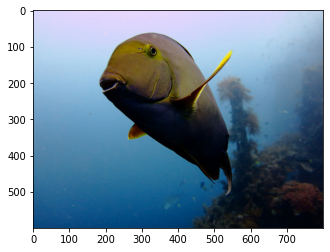

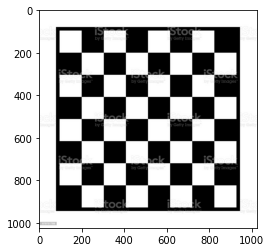

In [3]:
plt.imshow(frame_f)
plt.show()
plt.imshow(frame_c)
plt.show()

(600, 401, 3)


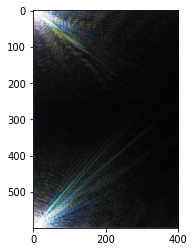

In [4]:

#Фурье-образ рыбы
orig_f = np.fft.rfft2(frame_f, axes=(0,1))
res_f = (np.abs(orig_f)/100).astype("int")

print(res_f.shape)
plt.imshow(np.clip(res_f, 0, 255))
plt.show()

(1024, 513, 3)


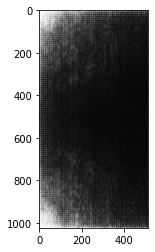

In [5]:

#Фурье-образ шахмат
orig_c = np.fft.rfft2(frame_c, axes=(0,1))
res_c = (np.abs(orig_c)/100).astype("int")

print(res_c.shape)
plt.imshow(np.clip(res_c, 0, 255))
plt.show()

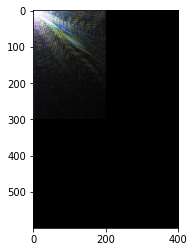

In [6]:
# обрезаем частоты у рыбы
orig_f_new = orig_f.copy()
orig_f_new[300:] = orig_f_new[300:] * 0
orig_f_new[:, 200:] = orig_f_new[:, 200:] * 0

plt.imshow(np.clip(np.abs(orig_f_new)/100, 0, 255).astype("int"))
plt.savefig("out.jpg")
plt.show()

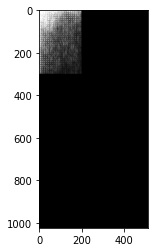

In [7]:
# обрезаем частоты у шахмат
orig_c_new = orig_c.copy()
orig_c_new[300:] = orig_c_new[300:] * 0
orig_c_new[:, 200:] = orig_c_new[:, 200:] * 0

plt.imshow(np.clip(np.abs(orig_c_new)/100, 0, 255).astype("int"))
plt.show()

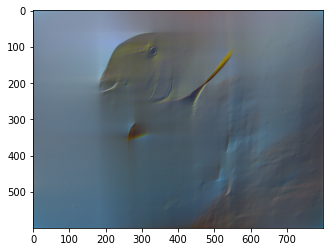

In [8]:
#то, что получилось в итоге
back = np.fft.irfft2(orig_f_new, axes=(0,1));
m1 = np.min(back);
m2 = np.max(back);
back = (back - m1) / (m2 - m1) * 255
back = back.astype("int")

plt.imshow(back)
plt.show()

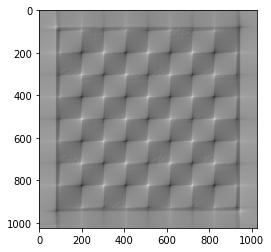

In [9]:
#то, что получилось в итоге
back = np.fft.irfft2(orig_c_new, axes=(0,1));
m1 = np.min(back);
m2 = np.max(back);
back = (back - m1) / (m2 - m1) * 255
back = back.astype("int")

plt.imshow(back)
plt.savefig("out2.jpg")
plt.show()